## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv('Train_Data.csv')
data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [3]:
data.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


## Visualizing the data

<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

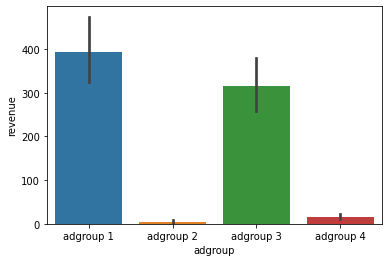

In [4]:
sns.barplot(x='adgroup', y='revenue', data=data)

<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

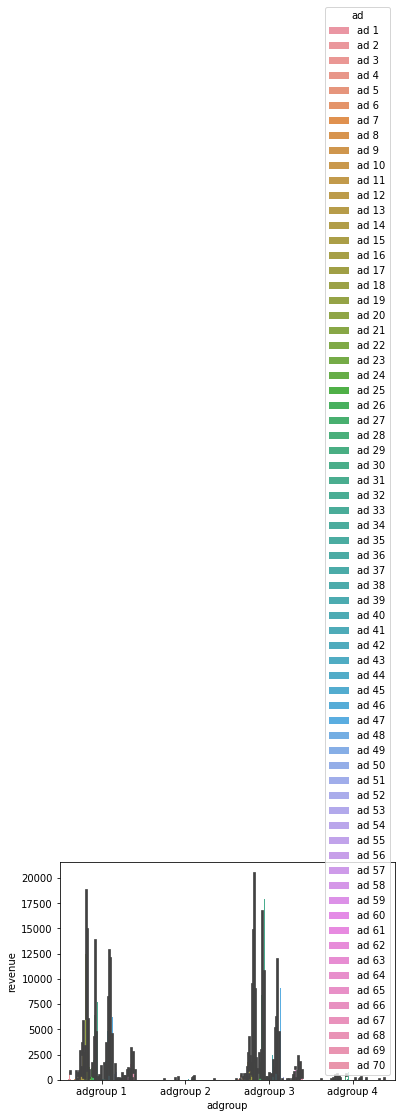

In [5]:
sns.barplot(x='adgroup', y='revenue', hue='ad', data=data)

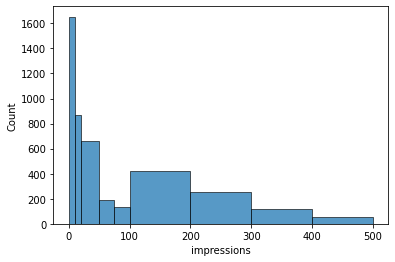

In [6]:
sns.histplot(data.impressions, bins=[0,10,20,50,75,100,200,300,400,500], binrange=(0,500));

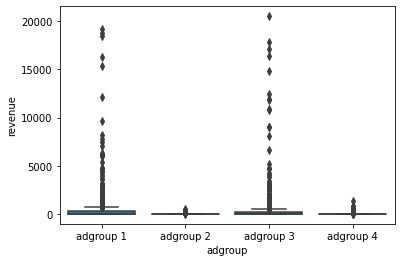

In [7]:
sns.boxplot(x=data.adgroup, y=data.revenue);

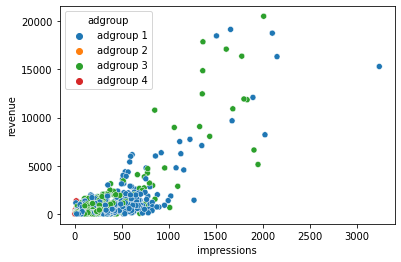

In [8]:
sns.scatterplot(x='impressions',
                y='revenue',
                hue='adgroup',
                data=data);

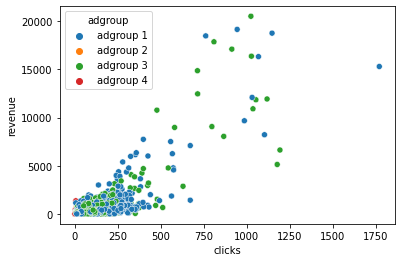

In [9]:
sns.scatterplot(x='clicks',
                y='revenue',
                hue='adgroup',
                data=data);

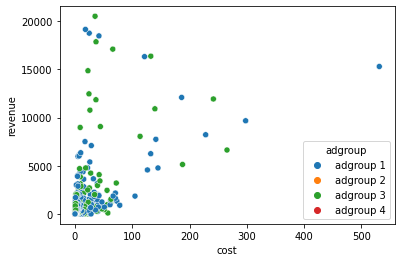

In [10]:
sns.scatterplot(x='cost',
                y='revenue',
                hue='adgroup',
                data=data);

## Preprocessing the data

In [11]:
data.drop('date', axis=1, inplace=True)
data.head()

,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [12]:
data.drop('campaign', axis=1, inplace=True)

In [13]:
data['CTR'] = data['clicks']/data['impressions']
data['CPC'] = data['cost']/data['clicks']
data['CPA'] = data['cost']/data['conversions']
data['ROI'] = data['revenue']/data['cost']
data.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf,0.000000
1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN,NaN
2,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf,0.000000
3,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf,0.000000
4,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225,717.604651


In [14]:
data.isnull().sum()

adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
CPA            444
ROI            444
dtype: int64

In [15]:
data.fillna(0, inplace=True)

In [16]:
data.replace([np.inf, -np.inf], 0, inplace=True)
data.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,0.0000,0.000000
1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,0.0000,0.000000
2,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,0.0000,0.000000
3,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,0.0000,0.000000
4,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225,717.604651


In [17]:
data.replace(0, np.nan, inplace=True)
data.dropna(subset=data.columns, thresh=5, inplace=True)
data.fillna(0., inplace=True)

In [18]:
data.head()

,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,adgroup 1,ad 1,24,6.0,0.08,0.0,0.00,0.250000,0.013333,0.0000,0.000000
2,adgroup 3,ad 1,13,4.0,0.04,0.0,0.00,0.307692,0.010000,0.0000,0.000000
3,adgroup 4,ad 1,5,4.0,0.08,0.0,0.00,0.800000,0.020000,0.0000,0.000000
4,adgroup 1,ad 2,247,126.0,1.29,4.0,925.71,0.510121,0.010238,0.3225,717.604651
5,adgroup 2,ad 2,7,2.0,0.04,0.0,0.00,0.285714,0.020000,0.0000,0.000000


In [19]:
data = data[['adgroup', 'ad', 'impressions', 'clicks', 'cost', 'conversions', 'CTR', 'CPC', 'CPA', 'ROI', 'revenue']]
data.head()

,adgroup,ad,impressions,clicks,cost,conversions,CTR,CPC,CPA,ROI,revenue
0,adgroup 1,ad 1,24,6.0,0.08,0.0,0.250000,0.013333,0.0000,0.000000,0.00
2,adgroup 3,ad 1,13,4.0,0.04,0.0,0.307692,0.010000,0.0000,0.000000,0.00
3,adgroup 4,ad 1,5,4.0,0.08,0.0,0.800000,0.020000,0.0000,0.000000,0.00
4,adgroup 1,ad 2,247,126.0,1.29,4.0,0.510121,0.010238,0.3225,717.604651,925.71
5,adgroup 2,ad 2,7,2.0,0.04,0.0,0.285714,0.020000,0.0000,0.000000,0.00
